In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white",color_codes=True)

In [2]:
iris=pd.read_csv("/kaggle/input/iriscsv/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

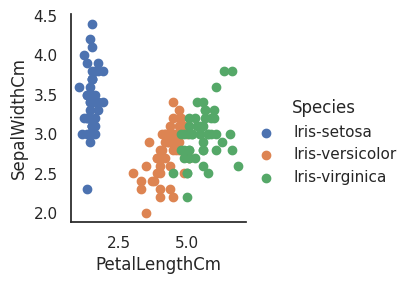

In [4]:
sns.FacetGrid(iris,hue="Species",height=3).map(plt.scatter,"PetalLengthCm","SepalWidthCm").add_legend()

In [5]:
flower_mapping={"Iris-setosa":0,"Iris-versicolor":1,    
"Iris-virginica":2}

In [6]:
iris["Species"]=iris["Species"].map(flower_mapping)

In [7]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [8]:
x=iris[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].values
y=iris[["Species"]].values

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
model=LogisticRegression()

In [11]:
model.fit(x,y)

LogisticRegression()

In [12]:
model.score(x,y)

0.9733333333333334

In [13]:
expected=y
predicted=model.predict(x)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
from sklearn import metrics

In [15]:
print(metrics.classification_report(expected,predicted)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [16]:
print(metrics.confusion_matrix(expected,predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


In [17]:
new_data = pd.DataFrame({"SepalLengthCm": [5.1], "SepalWidthCm": [3.5], "PetalLengthCm": [1.4], "PetalWidthCm": [0.2]})
new_prediction = model.predict(new_data)
print("Prédiction pour new_data:", new_prediction)


Prédiction pour new_data: [0]


In [18]:
iris.iloc[50:148]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,1
51,52,6.4,3.2,4.5,1.5,1
52,53,6.9,3.1,4.9,1.5,1
53,54,5.5,2.3,4.0,1.3,1
54,55,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...,...
143,144,6.8,3.2,5.9,2.3,2
144,145,6.7,3.3,5.7,2.5,2
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2


In [19]:
new_data=pd.DataFrame({"SepalLengthCm":[7.0],"SepalWidthCm":[3.2],"PetalLengthCm":[4.7],"PetalWidthCm":[1.4]})
new_prediction=model.predict(new_data)
print("new_prediction:",new_prediction)

new_prediction: [1]
